# Kecenderungan dalam Deret Waktu

Misalkan suatu deret waktu memiliki fungsi nilaitengah konstan. Model untuk deret waktu tersebut dapat dituliskan sebagai berikut:

$Y_t=\mu_t+X_t$

dengan $E(X_t)=0$ untuk semua $t$.

## Kecenderungan Linear

Deret dikatakan memiliki kecenderungan linear dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t$

Berikut simulasi deret yang memiliki kecenderungan linear dalam waktu.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats


# Ignore all warnings
warnings.filterwarnings('ignore')
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
# membangkitkan data waktu dalam bentuk array (misalnya, 100 bulan)
np.random.seed(3001)
n=100
t = np.arange(n)

# Membuat deret dengan kecenderungan linear
beta1 = 0.5
beta0 = 10
deret = beta0 + beta1*t

# Menambahkan ingar acak
noise = np.random.normal(scale=2, size=n)  # Noise dengan standar deviasi 2
time_series = deret + noise  # Menggabungkan tren dengan noise

# Membuat DataFrame untuk menyimpan data
df = pd.DataFrame({"Time": pd.date_range(start="2017-01-01", periods=100, freq="M"),
                   "Value": time_series})


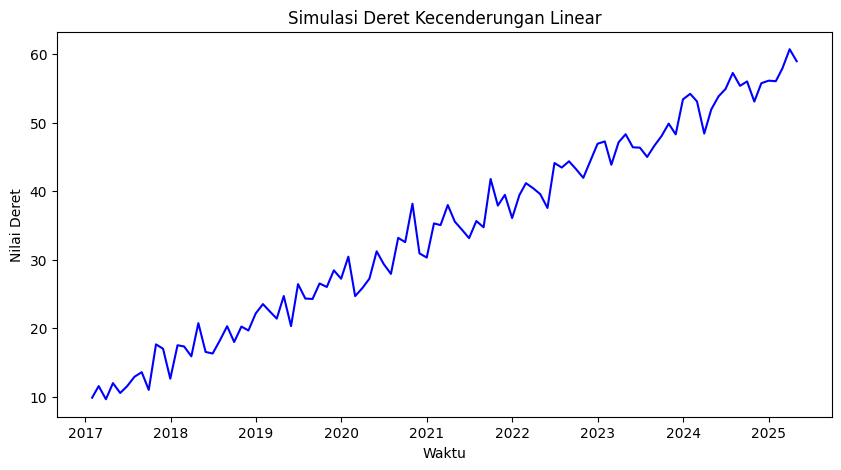

In [ ]:
# Plot deret waktu dengan tren linear
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Value"], color="b")
plt.xlabel("Waktu")
plt.ylabel("Nilai Deret")
plt.title("Simulasi Deret Kecenderungan Linear")
plt.show()

Cek apakah ada korelasi antar pengamatan?

Dari plot deret waktu tersebut terdapat korelasi antar pengamatan. Nilai dalam plot deret waktu ini masih dipengaruhi oleh nilai-nilai sebelumnya, terutama dalam 10 langkah ke belakang, yang ditunjukkan oleh autokorelasi yang cukup tinggi. Seiring bertambahnya jarak waktu (lag), pengaruhnya mulai berkurang, tetapi masih terasa hingga lag 20. Pola seperti ini biasanya muncul dalam data yang memiliki tren, di mana nilai di masa depan cenderung mengikuti pola dari masa lalu. Hal ini menunjukkan bahwa data tidak bersifat acak.



In [ ]:
# Konversi kolom Time menjadi angka (misalnya jumlah bulan sejak periode pertama)
df["Time_Numeric"] = (df["Time"].dt.to_period("M") - df["Time"].dt.to_period("M").min()).apply(lambda x: x.n)

# Hitung korelasi antara Time_Numeric dan Value
correlation = df["Time_Numeric"].corr(df["Value"])

print(f"Nilai korelasi antara Time dan Value: {correlation:.4f}")

Nilai korelasi antara Time dan Value: 0.9908


In [ ]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = df["Time_Numeric"]
Y = df["Value"]

#memanggil package statsmodels
import statsmodels.api as sm

# Tambahkan konstanta (intercept) ke model regresi
X = sm.add_constant(X)

# Buat dan jalankan model regresi
model = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5258.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           5.85e-87
Time:                        07:02:57   Log-Likelihood:                -208.21
No. Observations:                 100   AIC:                             420.4
Df Residuals:                      98   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.9308      0.389     25.517   

Bagaimana hasil pengepasan model regresi dibandingkan dengan nilai parameter asli?
Hasil pengepasan model regresi menunjukkan bahwa estimasi parameter cukup mendekati nilai parameter asli.
	•	Intercept (const) sebesar 9.9308 cukup dekat dengan nilai awal yaitu 10 dan 0,5
	•	Koefisien Time_Numeric sebesar 0.4925 juga mendekati tren yang diharapkan jika data mengikuti pola kenaikan sekitar 0.5 per unit waktu.
	•	Standar Errornya juga cukup kecil, yang berarti estimasi parameter memiliki ketepatan tinggi.
	•	Dengan R-squared sebesar 0.982, model ini dapat menjelaskan hampir seluruh variasi dalam data, menunjukkan bahwa pengepasan model sangat baik.

Apakah model regresi yang dipaskan sudah bagus?
Ya sudah bagus,
	•	Nilai R-squared sebesar 0.982 berarti model ini bisa menjelaskan 98,2% variasi dalam data, sehingga model sangat cocok dengan data dan dapat digunakan untuk memprediksi nilai pada periode selanjutnya.
	•	Adjusted R-squared juga 0.982, hampir sama dengan R-squared, yang menunjukkan bahwa model tidak mengalami overfitting, meskipun hanya menggunakan satu variabel.
	•	F-statistic sebesar 5258 dengan p-value hampir nol menunjukkan bahwa model ini sangat signifikan secara statistik.
	•	Koefisien Time_Numeric atau beta 1 sebesar 0.4925, yang berarti ada hubungan linier yang kuat antara waktu dan nilai dalam data. teks tebal

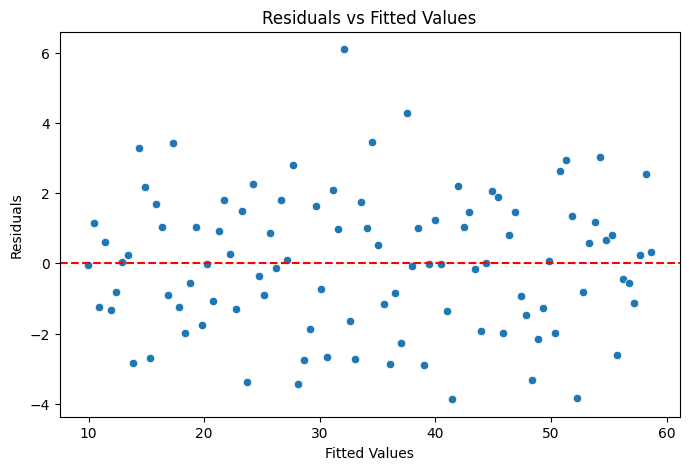

In [ ]:
# Analisis Sisaan Model
import seaborn as sns

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


Apa interpretasi dari plot tersebut?
 plot antara fitted values dan residual ini untuk mengejek homogenitas,
 	1.	Penyebaran Residual Secara Acak:
Titik-titik residual tersebar tanpa pola tertentu di sekitar garis nol, yang menunjukkan bahwa asumsi homoskedastisitas (varian residual konstan) terpenuhi. Tidak ada pola berbentuk melengkung atau menyebar melebar yang menandakan heteroskedastisitas.
	2.	Tidak Ada Pola Sistematis:
Jika ada pola melengkung atau berbentuk seperti corong, itu bisa menandakan hubungan non-linier atau varians residual yang tidak konstan. Namun, dalam plot ini, residual tersebar merata, menunjukkan bahwa model regresi sudah cukup baik dalam menangkap hubungan antara variabel independen dan dependen.
	3.	Distribusi Residual Simetris:
Titik-titik residual tersebar relatif seimbang di atas dan di bawah garis nol, menunjukkan bahwa tidak ada bias sistematis dalam prediksi model.

Memiliki Rataannya 0 berarti bahwa kesalahan prediksi model secara keseluruhan seimbang, sehingga model tidak memiliki bias dalam estimasi nilai rata-rata.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")


P-value Breusch-Pagan Test: 0.8042


Apa kesimpulan dari nilai uji Breusch Pagan tersebut?
dengan P-value sebesar 0.8045 yang lebih besar dari tingkat signifikasi 0.05 berarti kita tidak punya bukti untuk menolah H0, hasil tersebut mendukung hasil dari plot yang berarti tidak terbukti terjadi pelanggaran.

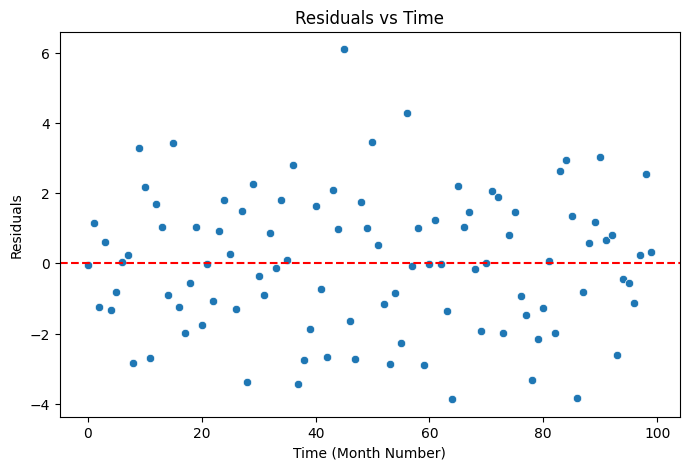

In [ ]:
# Plot residual vs time
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Time_Numeric"], y=model.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")
plt.show()


Plot time dan residual untuk melihat autokorelasinya,


<Figure size 800x500 with 0 Axes>

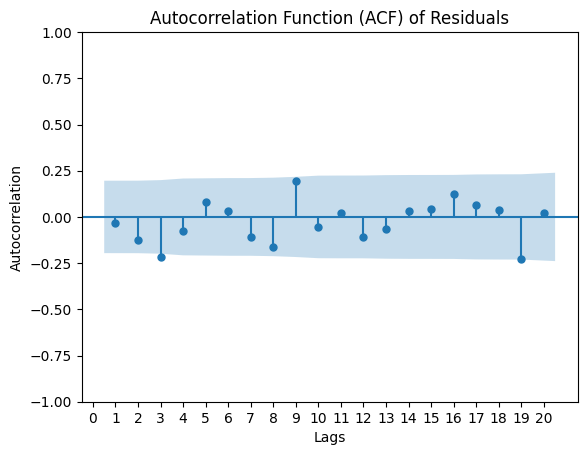

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(8, 5))
plot_acf(model.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Apa yang dapat Anda simpulkan dari plot di atas?
Dari plot ACF residual, dapat disimpulkan bahwa tidak ada autokorelasi yang signifikan dalam kesalahan model. Hal ini terlihat dari semua titik yang berada dalam batas kepercayaan 0,05, sehingga tidak ada pola tertentu dalam residual yang berulang dari waktu ke waktu. Dengan kata lain, kesalahan model tidak saling berkaitan dengan kesalahan sebelumnya, yang menunjukkan bahwa asumsi regresi tentang tidak adanya autokorelasi telah terpenuhi.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.120161   0.728860
2    1.690963   0.429351
3    6.544594   0.087920
4    7.201980   0.125592
5    7.864393   0.163869
6    7.969352   0.240357
7    9.201405   0.238518
8   12.091148   0.147183
9   16.211228   0.062599
10  16.560187   0.084680
11  16.601719   0.120221
12  18.022774   0.115001
13  18.564142   0.137250
14  18.668851   0.177992
15  18.898345   0.218377
16  20.713840   0.189774
17  21.187471   0.218017
18  21.361996   0.261545
19  27.761677   0.088124


Apa kesimpulan dari hasil uji Ljung-Box tersebut?
Dari hasil uji Ljung-Box mendukung argumen dari plot yang menyatakan bahwa seluruh lagnya signifikkan walaupun plot lag 3 dan 19 terlihat keluar sedikit dari range namun dari hasil Ljung-Box tes terlihat bahwa lag tersebut masih diatas 0,05 yang berarti tidak ada autokorelasi yang signifikan.


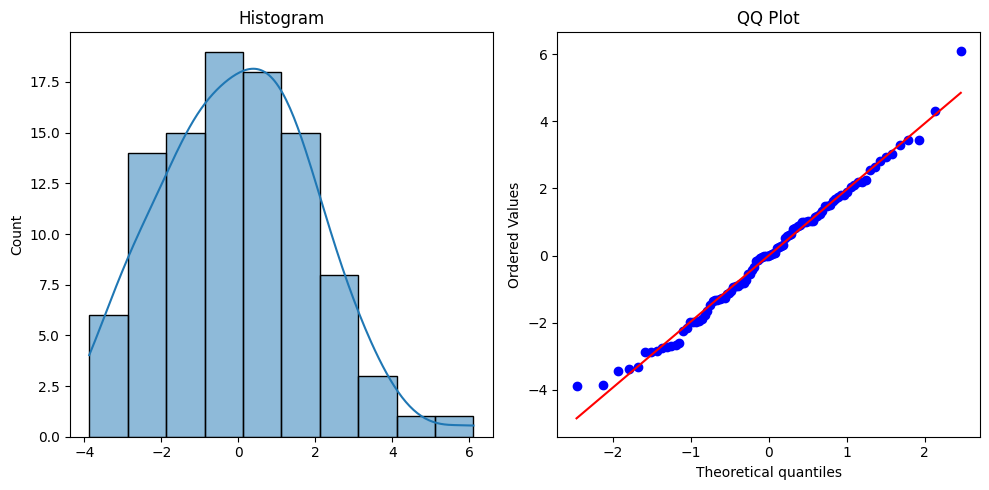

In [ ]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(model.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Apa kesimpulan Anda berdasarkan plot di ataS
Terlihat dari plot asumsi normalitasnya tidak lianggar alaupun bentuknya terlihat sedikit melenceng dari bentuk lonceng tidak simetris dan hasil dari qq-plotnya juga sedikit melenceng. Oleh karena itu dibutuhkan uji lanjut untuk melihat secara jelas.

In [ ]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.988668110657226, p-value = 0.5586924903887203


Apakah kesimpulan Anda dari nilai uji Shapiro Wilk sama dengan kesimpulan Anda berdasarkan plot?
Ya sama, bahwa data tersebut menyebar normal dibuktikan hasil p-value 0,558 yang berada di atas 0.05. Sehingga dapat dikatakan model tersebut sudah bagus.

## Kecenderungan Kuadratik

Deret dikatakan memiliki kecenderungan kuadratik dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t+\beta_2t^2$


In [7]:
# Menentukan parameter simulasi
np.random.seed(2025)
n_periods = 120
beta_0, beta_1, beta_2= 50, 0.5, 0.02
noise = np.random.normal(0, 10, n_periods)
time = np.arange(n_periods)

# Membuat komponen kuadratik
quadratic_component = beta_0 + beta_1 * time + beta_2 * time**2

# Menambahkan noise untuk membuat data lebih realistis
data = quadratic_component + noise

# Membuat DataFrame
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')
df_quad = pd.DataFrame({'Date': dates, 'Value': data})

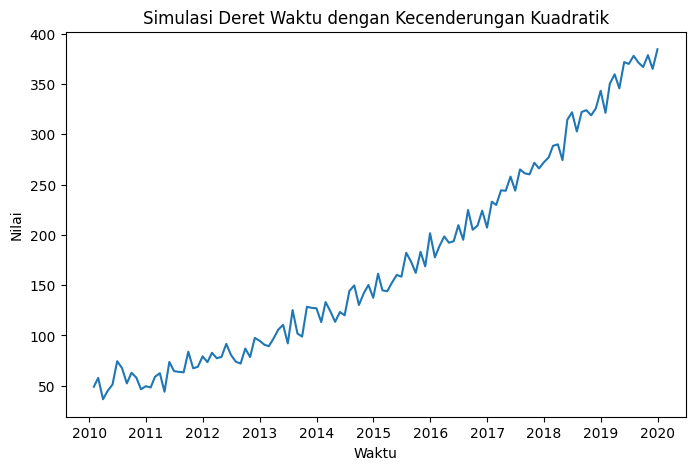

In [8]:
# Plot hasil simulasi deret waktu dengan kecenderungan kuadratik
plt.figure(figsize=(8, 5))
plt.plot(df_quad.Date, df_quad['Value'])
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.show()

Plot tersebut merupakan plot kuadratik karena berbentuk kurva,

In [21]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = np.column_stack((time, time**2))
X = sm.add_constant(X)
Y = data


# Buat dan jalankan model regresi
model_quad_full = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6603.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          5.02e-121
Time:                        13:05:43   Log-Likelihood:                -441.14
No. Observations:                 120   AIC:                             888.3
Df Residuals:                     117   BIC:                             896.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7612      2.607     19.855      0.0

Berdasarkan hasil regresi OLS yang di analisis, model ini memiliki performa yang sangat baik dalam menjelaskan variabel dependen. Hal ini terlihat dari nilai R-squared (R²) sebesar 0.991, yang berarti model mampu menjelaskan 99.1% variasi dalam data. Dengan kata lain, model ini memiliki kecocokan yang sangat tinggi terhadap data yang saya gunakan. Selain itu, Adjusted R-squared yang tetap 0.991 menunjukkan bahwa penambahan variabel independen tidak menyebabkan overfitting. Untuk menguatkan hasil ini, nilai F-statistic sebesar 6603 dengan p-value yang sangat kecil (5.02e-121) membuktikan bahwa model ini secara keseluruhan signifikan dalam menjelaskan variabel dependen.

Selanjutnya, jika melihat interpretasi koefisien, intercept (51.7612) menunjukkan bahwa ketika waktu t = 0, nilai prediksi variabel dependen adalah 51.7612. Koefisien untuk variabel linear (x1 = 0.3996) mengindikasikan bahwa setiap peningkatan satu unit dalam waktu akan meningkatkan variabel dependen sebesar 0.3996, dengan asumsi faktor kuadratik tetap. Sementara itu, koefisien quadratic (x2 = 0.0207) menunjukkan bahwa kenaikan satu unit dalam t² akan meningkatkan variabel dependen sebesar 0.0207, yang mengindikasikan adanya pola percepatan dalam tren waktu. Yang penting untuk dicatat, semua variabel dalam model ini memiliki p-value kurang dari 0.05, yang berarti semuanya signifikan secara statistik.

Dari segi diagnostik model, terlihat juga melihat bahwa Durbin-Watson sebesar 2.198, yang menunjukkan bahwa tidak ada autokorelasi signifikan dalam residual. Kemudian, saya melakukan pengujian normalitas residual dengan Omnibus dan Jarque-Bera (JB) tests, yang hasilnya menunjukkan bahwa residual dalam model ini mendekati distribusi normal karena p-value lebih besar dari 0.05. Namun, ada satu hal yang perlu diperhatikan, yaitu Condition Number yang sangat tinggi (1.88e+04). Nilai ini mengindikasikan adanya multikolinearitas atau potensi masalah numerik yang bisa memengaruhi kestabilan estimasi koefisien.

Kesimpulan dari analisis ini adalah bahwa model yang saya gunakan sangat baik dalam menjelaskan variabel dependen, terbukti dari R² yang tinggi (99.1%), serta semua koefisien yang signifikan secara statistik. Model ini juga tidak menunjukkan autokorelasi yang signifikan pada residual. Meskipun begitu, saya tetap harus memperhatikan tingginya multikolinearitas antara x1 (t) dan x2 (t²), karena ini bisa menyebabkan ketidakstabilan dalam hasil regresi. Selain itu, meskipun hasil uji diagnostik residual menunjukkan bahwa residual masih dalam batas wajar, perlu dilakukan pengecekan lebih lanjut untuk melihat apakah ada indikasi heteroskedastisitas yang dapat mengganggu asumsi model regresi.

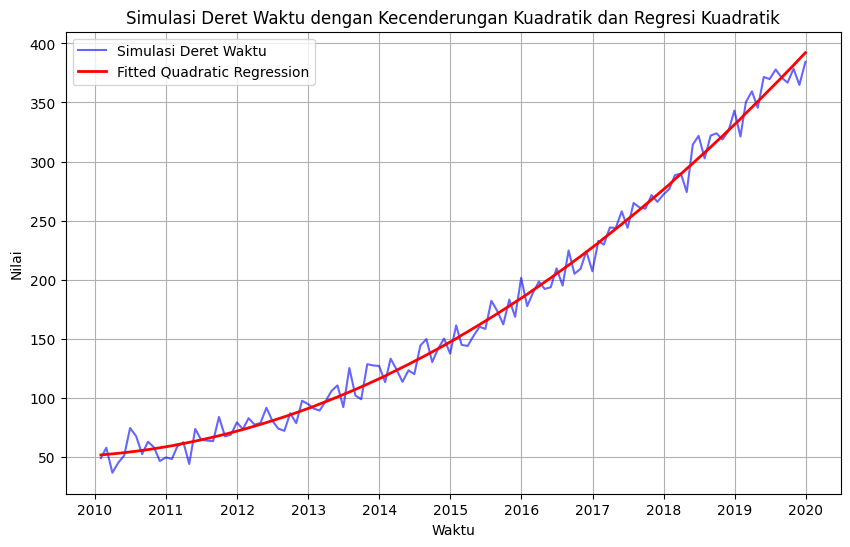

In [10]:
# Prediksi menggunakan model yang sudah dilatih
data_pred = model_quad.predict(X)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred, label='Fitted Quadratic Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik dan Regresi Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Grafik ini menunjukkan bahwa data memiliki pola pertumbuhan kuadratik, di mana nilai meningkat semakin cepat seiring waktu. Model regresi kuadratik (garis merah) cukup baik dalam menangkap tren utama, terutama setelah 2012, meskipun ada sedikit perbedaan di awal periode. Namun, data asli menunjukkan fluktuasi yang lebih besar, terutama setelah 2015, yang tidak sepenuhnya ditangkap oleh model.

In [23]:
# Model 1: Regresi Linier (Menggunakan time)
X_linear = sm.add_constant(time.reshape(-1, 1))  # Menambahkan intercept tanpa time**2
Y = data  # Variabel dependen

# Jalankan model regresi linear
model_linear = sm.OLS(Y, X_linear).fit()

# Model 2: Regresi Kuadratik (Menggunakan time**2)
X_quad = sm.add_constant(time**2)  # Menggunakan hanya time**2 sebagai variabel independen

# Jalankan model regresi kuadratik
model_quad_only = sm.OLS(Y, X_quad).fit()

# Prediksi menggunakan model regresi linier dan kuadratik
data_pred_linear = model_linear.predict(X_linear)  # Prediksi menggunakan model linier
data_pred_quad = model_quad_only.predict(X_quad)   # Prediksi menggunakan model kuadratik

# Tampilkan hasil regresi linier
print("=== Hasil Regresi Linier ===")
print(model_linear.summary())

# Tampilkan hasil regresi kuadratik
print("\n=== Hasil Regresi Kuadratik ===")
print(model_quad_only.summary())


=== Hasil Regresi Linier ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1984.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.20e-75
Time:                        15:07:37   Log-Likelihood:                -552.43
No. Observations:                 120   AIC:                             1109.
Df Residuals:                     118   BIC:                             1114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3710  

1. Regresi Linier (Time)
	•	R-squared (R²) = 0.944, yang berarti 94.4% variasi dalam data dapat dijelaskan oleh model ini. Meskipun cukup tinggi, masih ada pola yang tidak tertangkap oleh regresi linier.
	•	Koefisien Intercept (const) = 3.3710 menunjukkan bahwa ketika waktu t = 0, nilai prediksi y adalah 3.3710, tetapi hasil ini tidak signifikan (p-value = 0.447).
	•	Koefisien Time (2.8601) menunjukkan bahwa setiap kenaikan 1 unit waktu meningkatkan y sebesar 2.8601, dan ini signifikan (p-value = 0.000).
	•	Durbin-Watson = 0.347, menunjukkan adanya autokorelasi kuat dalam residual, yang berarti model ini mungkin kurang valid.
	•	Omnibus & Jarque-Bera Tests menunjukkan p-value kecil (< 0.05), yang berarti residual tidak terdistribusi normal, yang bisa menjadi masalah untuk analisis regresi.
Model linier cukup baik dalam menjelaskan data (R² tinggi), tetapi ada indikasi autokorelasi yang kuat dan residual yang tidak normal, yang dapat membuat hasil regresi menjadi bias.

2. Regresi Kuadratik (Time²)
	•	R-squared (R²) = 0.990, yang berarti model ini menjelaskan 99.0% variasi dalam data, lebih baik dibandingkan model linier.
	•	Koefisien Intercept (const) = 60.6303, menunjukkan bahwa ketika waktu t = 0, nilai prediksi y adalah 60.6303, dan hasil ini signifikan (p-value = 0.000).
	•	Koefisien Time² (0.0238) menunjukkan bahwa setiap kenaikan 1 unit dalam t² meningkatkan y sebesar 0.0238, dengan p-value = 0.000, yang berarti sangat signifikan.
	•	Durbin-Watson = 1.948, yang mendekati 2, menunjukkan tidak ada autokorelasi signifikan, sehingga model ini lebih valid dibandingkan model linier.
	•	Omnibus & Jarque-Bera Tests menunjukkan p-value lebih besar dari 0.05, yang berarti residual terdistribusi normal, sehingga asumsi regresi lebih terpenuhi dibandingkan model linier.
Kesimpulan: Model kuadratik lebih unggul dibandingkan model linier karena memiliki R² lebih tinggi, residual yang lebih normal, dan tidak mengalami autokorelasi signifikan. Ini menunjukkan bahwa data lebih sesuai dengan pola pertumbuhan kuadratik daripada linier.

Kesimpulan Akhir: Model Mana yang Lebih Baik?

Model regresi kuadratik lebih baik daripada model regresi linier, karena:
	•	R² lebih tinggi (0.990 vs. 0.944), sehingga lebih mampu menjelaskan variasi dalam data.
	•	Tidak ada autokorelasi signifikan, sedangkan model linier memiliki autokorelasi kuat.
	•	Residual lebih normal, yang memenuhi asumsi regresi lebih baik dibandingkan model linier.
Model regresi linier kurang cocok karena tidak menangkap pola pertumbuhan data dengan baik dan mengalami masalah autokorelasi serta distribusi residual yang tidak normal.

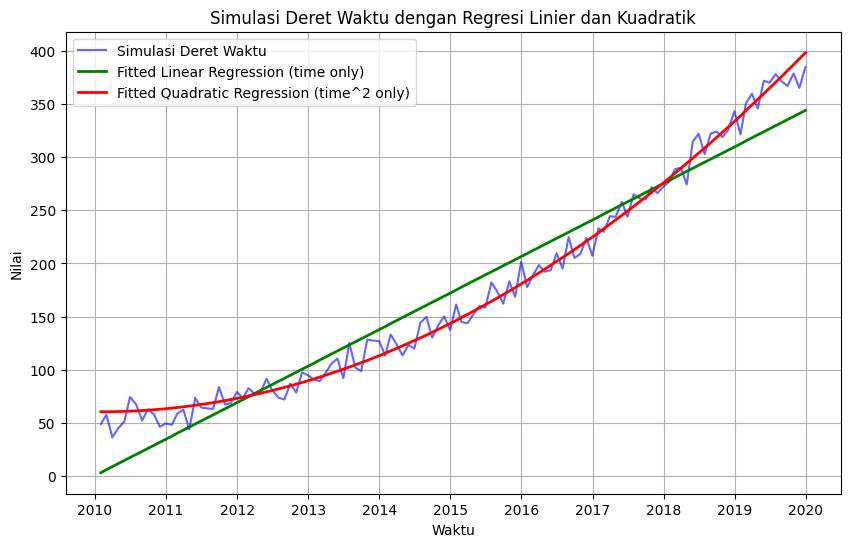

In [24]:
# Gabungkan Plot Regresi Linier dan Kuadratik
plt.figure(figsize=(10, 6))

# Plot data asli (deret waktu)
plt.plot(df_quad.Date, df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)

# Plot hasil regresi linier (time saja)
plt.plot(df_quad.Date, data_pred_linear, label='Fitted Linear Regression (time only)', color='green', linewidth=2)

# Plot hasil regresi kuadratik (time**2 saja)
plt.plot(df_quad.Date, data_pred_quad, label='Fitted Quadratic Regression (time^2 only)', color='red', linewidth=2)

# Konfigurasi plot
plt.title('Simulasi Deret Waktu dengan Regresi Linier dan Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Grafik ini menunjukkan perbandingan antara regresi linier (garis hijau) dan regresi kuadratik (garis merah) dalam memprediksi pola data deret waktu (garis biru). Regresi linier menggunakan garis lurus untuk menyesuaikan data, tetapi tidak cukup fleksibel untuk menangkap pola pertumbuhan yang semakin cepat. Di awal periode (2010-2012), model linier memberikan prediksi yang terlalu rendah dibandingkan data sebenarnya (underestimasi). Setelah tahun 2016, model ini mulai memberikan prediksi yang lebih tinggi dari data asli (overestimasi), tetapi tetap tidak menangkap pola percepatan pertumbuhan dengan baik.

Di sisi lain, regresi kuadratik lebih akurat dalam mengikuti tren data, terutama setelah tahun 2013. Pada awal periode, model ini memang agak datar, tetapi semakin lama, model ini menyesuaikan diri dengan pertumbuhan yang semakin cepat. Di akhir periode (2017-2020), regresi kuadratik lebih baik dalam menangkap percepatan pertumbuhan dibandingkan regresi linier.

Kesimpulannya, regresi kuadratik lebih cocok digunakan dibandingkan regresi linier, karena lebih mampu menggambarkan pola pertumbuhan yang semakin meningkat. Regresi linier kurang akurat karena hanya menggunakan garis lurus, sementara data aslinya menunjukkan pola yang melengkung ke atas.

Cek apakah model regresi kuadratik yang dipaskan terhadap sudah memenuhi asumsi!

In [ ]:
# cek asumsi model regresi kuadratik

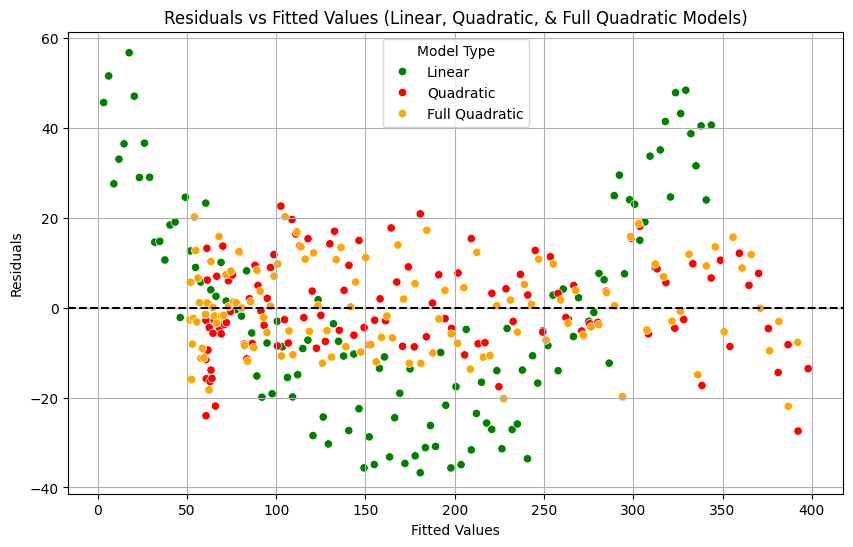

In [22]:
# **Gabungkan plot residuals vs. fitted values untuk ketiga model**
plt.figure(figsize=(10, 6))

# Membuat DataFrame residual untuk gabungan plotting
df_residuals = pd.DataFrame({
    'Fitted Values': np.concatenate([model_linear.fittedvalues, model_quad_only.fittedvalues, model_quad_full.fittedvalues]),
    'Residuals': np.concatenate([model_linear.resid, model_quad_only.resid, model_quad_full.resid]),
    'Model': ['Linear'] * len(model_linear.fittedvalues) + ['Quadratic'] * len(model_quad_only.fittedvalues) + ['Full Quadratic'] * len(model_quad_full.fittedvalues)
})

# Scatter plot residuals vs. fitted values untuk ketiga model
sns.scatterplot(data=df_residuals, x='Fitted Values', y='Residuals', hue='Model', palette={'Linear': 'green', 'Quadratic': 'red', 'Full Quadratic': 'orange'})

# Tambahkan garis horizontal di y = 0
plt.axhline(y=0, color="black", linestyle="--")

# Konfigurasi plot
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Linear, Quadratic, & Full Quadratic Models)")
plt.legend(title="Model Type")
plt.grid(True)
plt.show()

Dari grafik residual vs fitted values, dapat kita lihat bahwa:
	•	Regresi linier (hijau) menunjukkan pola residual yang menyebar tidak merata, dengan variasi residual yang lebih besar di nilai fitted yang tinggi dan rendah. Ini menunjukkan bahwa homogenitas tidak terpenuhi (terjadi heteroskedastisitas), sehingga model ini kurang cocok untuk data ini.
	•	Regresi kuadratik (merah) lebih baik, tetapi masih ada pola tertentu di bagian fitted values yang lebih tinggi. Ini berarti bahwa model ini lebih dekat ke homogenitas, tetapi masih belum sempurna.
	•	Regresi kuadratik penuh (oranye) memiliki residual yang lebih tersebar secara acak, tanpa pola yang jelas. Ini menunjukkan bahwa homogenitas lebih terpenuhi dibandingkan model lainnya, sehingga model ini lebih stabil dan dapat memberikan estimasi yang lebih akurat.

Kesimpulan:
Model regresi kuadratik penuh paling memenuhi asumsi homogenitas, karena residualnya lebih merata.
Model regresi linier mengalami heteroskedastisitas, karena residualnya tidak tersebar merata dan membentuk pola.
Model regresi kuadratik lebih baik dari linier, tetapi masih menunjukkan sedikit pola heteroskedastisitas.

In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan untuk heteroskedastisitas
bp_test_linear = het_breuschpagan(model_linear.resid, model_linear.model.exog)
bp_test_quad_only = het_breuschpagan(model_quad_only.resid, model_quad_only.model.exog)
bp_test_quad_full = het_breuschpagan(model_quad_full.resid, model_quad_full.model.exog)

# Menampilkan hasil uji Breusch-Pagan untuk ketiga model
print(f"P-value Breusch-Pagan Test (Linear Model): {bp_test_linear[1]:.4f}")
print(f"P-value Breusch-Pagan Test (Quadratic Model - time^2 only): {bp_test_quad_only[1]:.4f}")
print(f"P-value Breusch-Pagan Test (Full Quadratic Model - time + time^2): {bp_test_quad_full[1]:.4f}")

P-value Breusch-Pagan Test (Linear Model): 0.6258
P-value Breusch-Pagan Test (Quadratic Model - time^2 only): 0.5691
P-value Breusch-Pagan Test (Full Quadratic Model - time + time^2): 0.4354


Hasil uji Breusch-Pagan digunakan untuk mendeteksi heteroskedastisitas dalam model regresi. Jika p-value > 0.05, maka tidak ada bukti kuat bahwa model mengalami heteroskedastisitas, artinya asumsi homogenitas residual terpenuhi.

Dari hasil yang ditampilkan:
	•	Regresi Linier → p-value = 0.6258
	•	Regresi Kuadratik (time² only) → p-value = 0.5691
	•	Regresi Kuadratik Lengkap (time + time²) → p-value = 0.4354

Semua p-value lebih besar dari 0.05, yang berarti tidak ada bukti signifikan adanya heteroskedastisitas dalam ketiga model. Dengan kata lain, homogenitas residual cukup terpenuhi untuk semua model.

Namun, jika dibandingkan:
	•	Regresi linier memiliki p-value tertinggi (0.6258), yang menunjukkan bahwa model ini memiliki tingkat homogenitas residual yang lebih baik dibandingkan dua model lainnya.
	•	Regresi kuadratik lengkap memiliki p-value paling rendah (0.4354), yang berarti ada sedikit indikasi heteroskedastisitas dibandingkan model lain, tetapi tetap tidak signifikan.

Kesimpulan:
Ketiga model memenuhi asumsi homogenitas residual, karena semua p-value > 0.05.Model regresi kuadratik lengkap memiliki p-value lebih rendah, tetapi masih dalam batas yang aman.

Index(['Date', 'Value'], dtype='object')


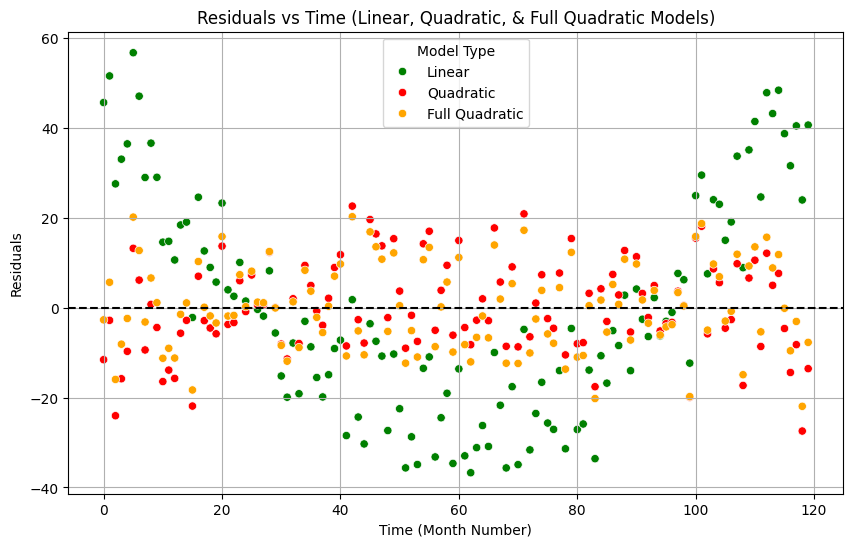

In [27]:
print(df_quad.columns)
df_quad["Time_Numeric"] = np.arange(len(df_quad))
df_residuals_time = pd.DataFrame({
    'Time_Numeric': np.concatenate([df_quad["Time_Numeric"], df_quad["Time_Numeric"], df_quad["Time_Numeric"]]),
    'Residuals': np.concatenate([model_linear.resid, model_quad_only.resid, model_quad_full.resid]),
    'Model': (['Linear'] * len(model_linear.resid)) +
             (['Quadratic'] * len(model_quad_only.resid)) +
             (['Full Quadratic'] * len(model_quad_full.resid))
})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_residuals_time, x='Time_Numeric', y='Residuals', hue='Model',
                palette={'Linear': 'green', 'Quadratic': 'red', 'Full Quadratic': 'orange'})

plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time (Linear, Quadratic, & Full Quadratic Models)")
plt.legend(title="Model Type")
plt.grid(True)
plt.show()

Grafik ini menampilkan residual terhadap waktu untuk tiga model regresi: linier (hijau), kuadratik (merah), dan kuadratik penuh (oranye). Untuk mengidentifikasi autokorelasi, kita perlu melihat apakah residual memiliki pola berulang atau berkumpul dalam tren tertentu seiring waktu.

1. Indikasi Autokorelasi pada Model Linier (Hijau)
	•	Terlihat pola sistematis dalam residual linier: Residual tidak tersebar secara acak, melainkan membentuk pola gelombang atau klaster.
	•	Pada bagian awal dan akhir data, residual semakin membesar secara teratur, menandakan adanya autokorelasi positif.
	•	Ini menunjukkan bahwa kesalahan prediksi dalam satu waktu masih dipengaruhi oleh kesalahan sebelumnya, yang merupakan tanda kuat adanya autokorelasi.

2. Indikasi Autokorelasi pada Model Kuadratik (Merah)
	•	Residual tersebar lebih merata dibandingkan model linier, tetapi masih ada beberapa pola di bagian tengah dan akhir data.
	•	Pola residualnya lebih acak dibandingkan model linier, tetapi tidak sepenuhnya bebas dari autokorelasi.
	•	Ini menunjukkan bahwa model kuadratik mengurangi autokorelasi, tetapi belum sepenuhnya menghilangkannya.

3. Indikasi Autokorelasi pada Model Kuadratik Lengkap (Oranye)
	•	Model ini memiliki distribusi residual yang lebih acak, tanpa pola gelombang atau tren yang jelas.
	•	Penyebaran residualnya lebih seragam, yang menunjukkan bahwa autokorelasi dalam model ini lebih kecil dibandingkan model lainnya.
	•	Ini menandakan bahwa model kuadratik penuh lebih baik dalam menangani autokorelasi dibandingkan model linier dan kuadratik sederhana.

Kesimpulan:
Model linier mengalami autokorelasi yang kuat, karena residualnya menunjukkan pola sistematis sepanjang waktu. Model kuadratik mengalami sedikit autokorelasi, tetapi masih lebih baik daripada model linier. Model kuadratik penuh memiliki residual yang lebih acak, yang menunjukkan bahwa autokorelasi berkurang secara signifikan.

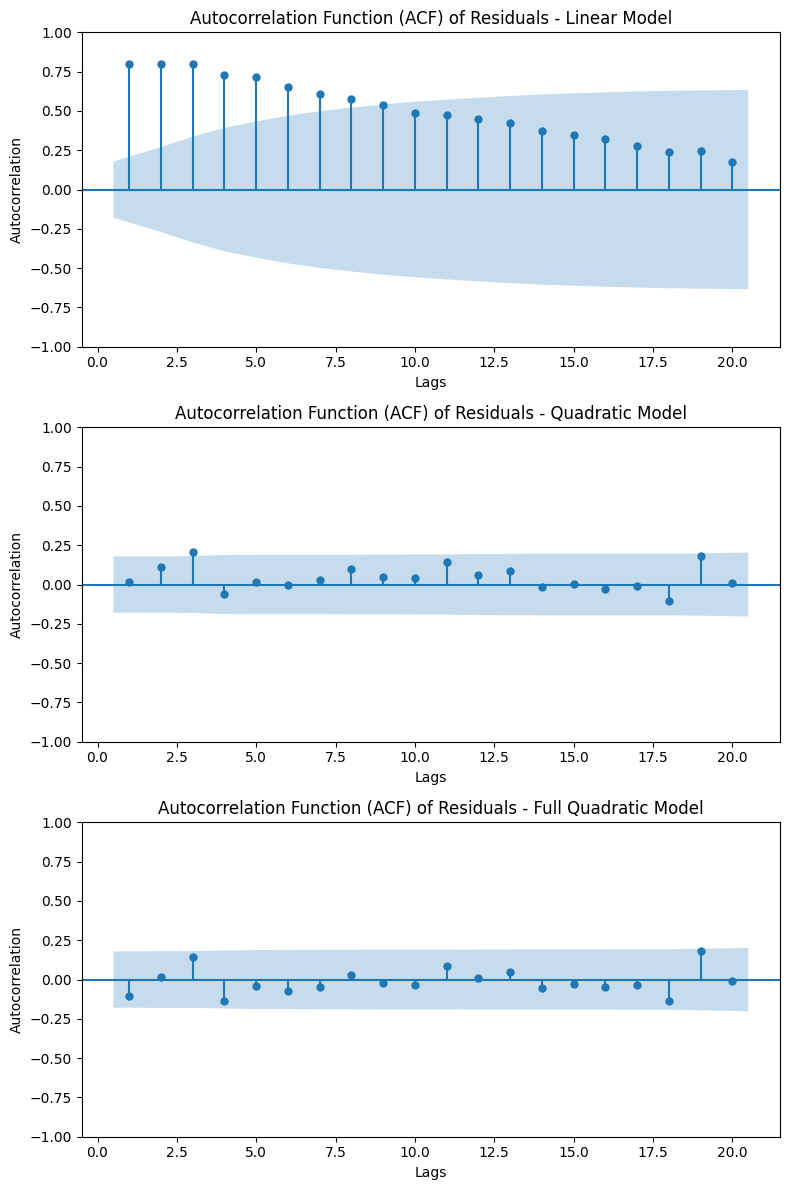

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

# **Plot ACF untuk Ketiga Model Residuals**
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# ACF untuk model linier
plot_acf(model_linear.resid, lags=20, zero=False, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF) of Residuals - Linear Model")
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("Autocorrelation")

# ACF untuk model kuadratik sederhana (time**2 saja)
plot_acf(model_quad_only.resid, lags=20, zero=False, ax=axes[1])
axes[1].set_title("Autocorrelation Function (ACF) of Residuals - Quadratic Model")
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Autocorrelation")

# ACF untuk model kuadratik lengkap (time + time**2)
plot_acf(model_quad_full.resid, lags=20, zero=False, ax=axes[2])
axes[2].set_title("Autocorrelation Function (ACF) of Residuals - Full Quadratic Model")
axes[2].set_xlabel("Lags")
axes[2].set_ylabel("Autocorrelation")

# Tampilkan plot
plt.tight_layout()
plt.show()

Plot ACF digunakan untuk melihat apakah ada autokorelasi dalam residual, yang berarti apakah ada pola hubungan antara residual dengan nilai residual sebelumnya. Jika autokorelasi tinggi, maka model memiliki masalah karena residual tidak benar-benar acak.

1. Regresi Linier (Plot ACF Pertama)
	•	Banyak lag di atas batas signifikan (area biru), terutama di lag awal hingga sekitar lag ke-10.
	•	Autokorelasi sangat kuat di lag-lag awal, dengan nilai tinggi yang secara perlahan menurun.
	•	Pola ini menunjukkan bahwa residual tidak acak dan ada autokorelasi kuat dalam model linier.
	•	Ini tidak baik, karena asumsi regresi mengharuskan residual bersifat acak.
Model regresi linier mengalami autokorelasi yang kuat, sehingga hasil regresinya bisa bias.

2. Regresi Kuadratik (Plot ACF Kedua)
	•	Sebagian besar lag berada di dalam area biru (tidak signifikan), tetapi masih ada beberapa lag yang sedikit keluar dari batas.
	•	Dibandingkan regresi linier, autokorelasi sudah berkurang, tetapi masih ada sedikit hubungan antar residual pada beberapa lag awal.
	•	Model ini lebih baik dibandingkan regresi linier, tetapi masih bisa diperbaiki.
Model kuadratik lebih baik daripada model linier dalam menangani autokorelasi, tetapi masih ada sedikit autokorelasi yang tersisa.

3. Regresi Kuadratik Lengkap (Plot ACF Ketiga)
	•	Hampir semua titik ACF berada di dalam area biru, yang menunjukkan bahwa tidak ada autokorelasi signifikan.
	•	Residual sudah cukup acak dan tidak menunjukkan hubungan kuat antar lag.
	•	Ini menunjukkan bahwa model kuadratik penuh paling baik dalam mengatasi autokorelasi.
Model regresi kuadratik penuh memiliki residual yang paling acak dan bebas dari autokorelasi, menjadikannya model terbaik di antara ketiga model.

Model Mana yang Terbaik?

Model linier memiliki autokorelasi yang sangat kuat, sehingga kurang cocok.
Model kuadratik mengurangi autokorelasi, tetapi belum sepenuhnya menghilangkannya.
Model kuadratik penuh adalah yang terbaik, karena residualnya sudah cukup acak dan bebas dari autokorelasi.

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual dari ketiga model
ljung_box_linear = acorr_ljungbox(model_linear.resid, lags=range(1, 20), return_df=True)
ljung_box_quad_only = acorr_ljungbox(model_quad_only.resid, lags=range(1, 20), return_df=True)
ljung_box_quad_full = acorr_ljungbox(model_quad_full.resid, lags=range(1, 20), return_df=True)

# Menampilkan hasil uji Ljung-Box untuk ketiga model
print("Ljung-Box Test Results (Linear Model):")
print(ljung_box_linear)

print("\nLjung-Box Test Results (Quadratic Model - time^2 only):")
print(ljung_box_quad_only)

print("\nLjung-Box Test Results (Full Quadratic Model - time + time^2):")
print(ljung_box_quad_full)

Ljung-Box Test Results (Linear Model):
       lb_stat      lb_pvalue
1    78.723762   7.143117e-19
2   157.214545   7.265998e-35
3   236.380726   5.769649e-51
4   303.737158   1.692904e-64
5   368.811847   1.556249e-77
6   423.809123   2.120156e-88
7   471.925521   8.665900e-98
8   515.660171  3.067109e-106
9   553.500501  1.977263e-113
10  585.318758  2.459468e-119
11  615.689829  6.161177e-125
12  642.894543  7.250668e-130
13  667.124470  3.640942e-134
14  686.472765  1.986994e-137
15  703.383548  3.533482e-140
16  718.023745  1.883575e-142
17  729.127448  5.585930e-144
18  737.149678  7.348014e-145
19  745.820480  6.904786e-146

Ljung-Box Test Results (Quadratic Model - time^2 only):
      lb_stat  lb_pvalue
1    0.034529   0.852586
2    1.499373   0.472515
3    6.722688   0.081282
4    7.224167   0.124506
5    7.248497   0.202806
6    7.248508   0.298476
7    7.364435   0.391946
8    8.601069   0.377058
9    8.933880   0.443400
10   9.152007   0.517741
11  11.807855   0.378258
12  

Uji Ljung-Box digunakan untuk mengevaluasi autokorelasi dalam residual. Jika p-value < 0.05, berarti residual memiliki autokorelasi signifikan, yang menunjukkan bahwa model belum sepenuhnya menangkap pola dalam data. Jika p-value > 0.05, maka residual bersifat acak, yang berarti model sudah cukup baik dalam menangkap pola data.

1. Model Regresi Linier
	•	P-value sangat kecil (di bawah 0.05) untuk semua lag (contoh: p-value = 7.14e-19 di lag 1).
	•	Ini menunjukkan bahwa residual sangat berkorelasi dengan lag sebelumnya, yang berarti autokorelasi sangat kuat.
	•	Model linier gagal menangkap pola dalam data, menyebabkan residual yang tidak acak.

Model regresi linier memiliki autokorelasi residual yang sangat tinggi, sehingga kurang cocok digunakan.

2. Model Regresi Kuadratik (time² only)
	•	Sebagian besar p-value > 0.05, terutama setelah lag 1.
	•	Ini menunjukkan bahwa autokorelasi telah berkurang secara signifikan dibandingkan model linier.
	•	Namun, masih ada beberapa lag yang mendekati batas signifikansi, artinya model ini belum sepenuhnya menghilangkan autokorelasi.

Model regresi kuadratik mengurangi autokorelasi, tetapi masih ada sedikit pola yang tersisa dalam residual.

3. Model Regresi Kuadratik Lengkap (time + time²)
	•	Semua p-value > 0.05, menunjukkan bahwa residual sudah cukup acak.
	•	Tidak ada indikasi autokorelasi yang signifikan di hampir semua lag.
	•	Model ini paling baik dalam menangkap pola dalam data, sehingga residualnya bebas dari autokorelasi.

Model regresi kuadratik penuh memiliki residual yang paling acak dan tidak mengalami autokorelasi, menjadikannya model terbaik dalam hal stabilitas residual.

Sehingga, Model linier memiliki autokorelasi residual yang sangat kuat, sehingga tidak cocok digunakan. Model kuadratik mengurangi autokorelasi, tetapi masih ada sedikit pola yang tersisa dalam residual. Model kuadratik penuh adalah yang terbaik, karena residualnya sudah cukup acak dan tidak menunjukkan autokorelasi signifikan.


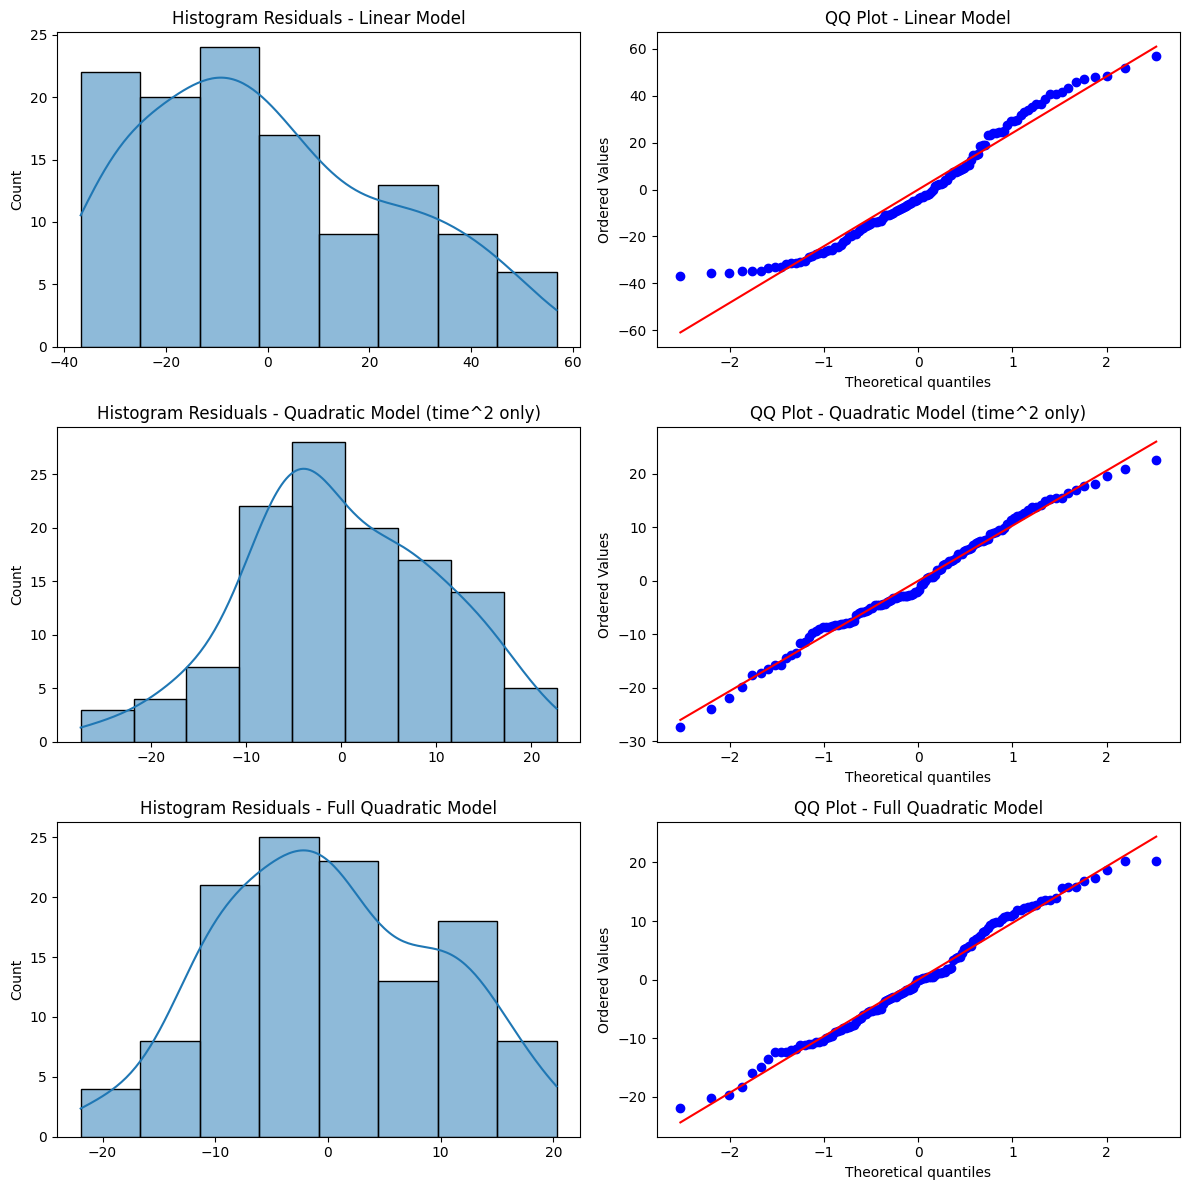

In [34]:
# Gabungkan histogram residual dan QQ plot dalam satu visualisasi
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

models = [(model_linear, 'Linear Model'), (model_quad_only, 'Quadratic Model (time^2 only)'), (model_quad_full, 'Full Quadratic Model')]

for i, (model, title) in enumerate(models):
    sns.histplot(model.resid, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram Residuals - {title}')

    stats.probplot(model.resid, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'QQ Plot - {title}')

plt.tight_layout()
plt.show()



1. Regresi Linier (Histogram & QQ Plot - Baris Pertama)
	•	Histogram: Residual tampak tidak berbentuk normal, dengan distribusi yang tidak simetris dan lebih tersebar di kedua sisi.
	•	QQ Plot: Banyak titik yang tidak mengikuti garis merah, terutama di bagian ekor, yang menunjukkan adanya outlier atau distribusi residual yang tidak normal.
	•	Kesimpulan: Model regresi linier memiliki residual yang tidak terdistribusi normal, yang bisa menyebabkan hasil regresi menjadi bias.

2. Regresi Kuadratik (Histogram & QQ Plot - Baris Kedua)
	•	Histogram: Bentuk distribusi residual lebih mendekati distribusi normal dibandingkan model linier.
	•	QQ Plot: Titik-titik residual lebih dekat ke garis merah dibandingkan model linier, tetapi masih ada sedikit deviasi di bagian ekor.
	•	Kesimpulan: Model regresi kuadratik lebih baik dalam menangani normalitas residual, tetapi masih ada sedikit penyimpangan, terutama di ekor distribusi.

3. Regresi Kuadratik Lengkap (Histogram & QQ Plot - Baris Ketiga)
	•	Histogram: Distribusi residual tampak lebih simetris dan menyerupai distribusi normal.
	•	QQ Plot: Titik-titik residual hampir semuanya berada di sekitar garis merah, yang menunjukkan bahwa residual mendekati distribusi normal.
	•	Kesimpulan: Model regresi kuadratik penuh memiliki residual yang paling mendekati distribusi normal, yang membuatnya lebih sesuai dengan asumsi regresi.

Sehingga dapat disimpulkan,
Model linier memiliki residual yang paling tidak normal, sehingga kurang cocok.
Model kuadratik (time² only) lebih baik, tetapi masih ada sedikit penyimpangan.
Model kuadratik penuh memiliki residual yang paling mendekati distribusi normal, menjadikannya model terbaik dalam hal normalitas residual. Jika ingin hasil regresi yang lebih valid dan sesuai dengan asumsi normalitas, model kuadratik penuh adalah pilihan terbaik.

Berdasarkan hasil evaluasi seluruh asumsi, model regresi kuadratik lengkap (time + time²) adalah yang paling baik. Model ini memenuhi normalitas residual, di mana distribusi residual lebih mendekati normal dibandingkan model lainnya. Selain itu, model ini juga memenuhi asumsi homogenitas (homoskedastisitas), yang berarti varians residual tetap konstan dan tidak menunjukkan pola heteroskedastisitas. Dari uji autokorelasi, model ini juga menunjukkan residual yang lebih acak tanpa pola berulang, menandakan bahwa tidak ada autokorelasi yang signifikan. Secara keseluruhan, model kuadratik lengkap lebih stabil, akurat, dan sesuai dengan asumsi regresi dibandingkan model linier maupun model kuadratik sederhana.

## Kecenderungan Musiman/Siklik

Misalkan suatu deret waktu memiliki nilaitengah $\mu_t$ yang didefinisikan sebagai berikut:

$\mu_t=\beta_0+\beta_1 cos(2\pi f t)+\beta_2 sin(2\pi ft)$

Deret tersebut memiliki kecenderungan kosinus yang berpola musiman.

Bentuk lain fungsi nilaitengah dari kecenderungan musiman (misalnya untuk data bulanan) adalah $\mu_t$ berupa suatu konstanta sejumlah 12 yang nilai berbeda-beda. Nilai ini diinterpretasikan sebagai nilai harapan rata-rata data untuk masing-masing bulan, atau dapat dituliskan sebagai berikut:

$\mu_t=\beta_1$ , untuk $t=1,13,25,...$
       
$\mu_t=\beta_2$ , untuk $t=2,14,26,...$

$.$

$.$

$.$

$\mu_t=\beta_{12}$ , $untuk t=12,24,36,...$


In [ ]:
# Menentukan parameter simulasi
np.random.seed(100)
n_periods = 120
beta0, beta1, beta2=50,-25, -2
freq=1/12

# Membuat komponen musiman
time = np.arange(n_periods)
seasonal_component = beta0+ beta1*np.cos(2*np.pi*time*freq)+beta2*np.sin(2*np.pi*time*freq)

# Menambahkan noise acak
noise = np.random.normal(0, 2, n_periods)

# Simulasi data dengan hanya komponen musiman dan noise (tanpa tren)
data = seasonal_component + noise

# Membuat index waktu (misalnya menggunakan bulan)
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')

# Membuat DataFrame untuk mempermudah analisis dan visualisasi
df_seasonal = pd.DataFrame({'Date': dates, 'Value': data})


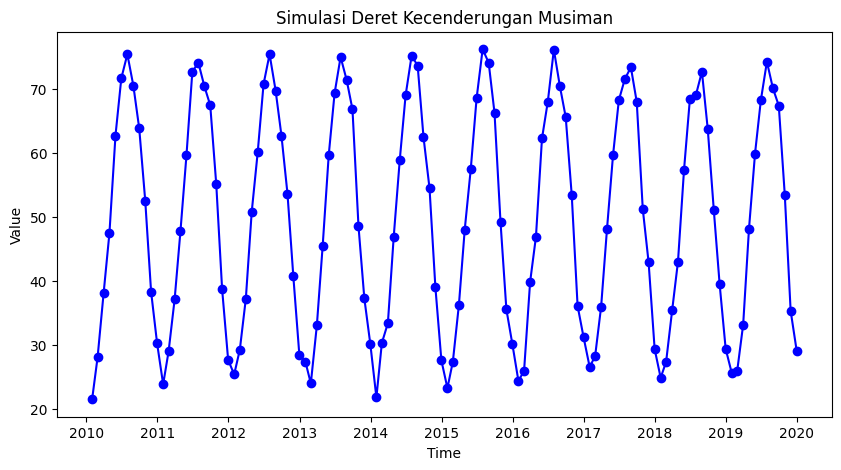

In [ ]:
# Plot data deret waktu
plt.figure(figsize=(10, 5))
plt.plot(df_seasonal["Date"], df_seasonal["Value"],'-ob')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulasi Deret Kecenderungan Musiman")
plt.show()


Perbedaan SIKLIK DAN MUSIMAN
Pola siklik terjadi dalam periode yang tidak tetap dan biasanya berkaitan dengan siklus ekonomi, seperti fase ekspansi dan resesi dalam bisnis. Misalnya, pasar saham yang mengalami tren naik dan turun dalam beberapa tahun adalah contoh pola siklik. Karena dipengaruhi oleh faktor ekonomi atau sosial, pola ini bisa berlangsung dalam jangka panjang, misalnya beberapa tahun hingga dekade.

Sementara itu, pola musiman adalah pola yang berulang secara teratur dalam periode waktu tertentu, seperti harian, bulanan, atau tahunan. Pola ini biasanya disebabkan oleh faktor alam atau budaya, seperti perubahan cuaca atau kebiasaan masyarakat. Contohnya, peningkatan penjualan pakaian hangat saat musim dingin atau lonjakan pemesanan hotel selama musim liburan. Berbeda dengan pola siklik, pola musiman memiliki periode yang jelas dan berulang dalam rentang waktu yang tetap.

Secara umum, pola siklik lebih fleksibel dan sulit diprediksi karena bergantung pada dinamika ekonomi dan sosial, sedangkan pola musiman lebih teratur dan lebih mudah diidentifikasi karena mengikuti pola berulang dalam waktu yang tetap. Jika perubahan dalam data terjadi dengan pola yang konsisten dalam periode tertentu, maka itu termasuk pola musiman. Namun, jika perubahan terjadi dalam jangka panjang tanpa pola waktu yang jelas, maka itu lebih cenderung sebagai pola siklik.

Dijadikan 1 kanran sama-sama periodenya berulang.

Misalkan deret tersebut merupakan deret musiman dengan periode musiman 12.

In [ ]:
# membuat dummy variabel musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
musim= Seasonality(12, initial_period=1).in_sample(df_seasonal.index)
musim.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [ ]:
musim

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# pengepasan model regresi tanpa intercept
musiman=sm.OLS(df_seasonal["Value"],musim).fit()

In [ ]:
print(musiman.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        04:22:11   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       24.4468      0.619     39.524      0.0

Bagaimana interpretasi dari hasil tersebut?
Kita menganggap peubah musiman sebagai peubah kategorik artinya januari sebagai kategori sendiri begitupun bulan2 yang lain. dan berulang 1 periode 12 kali (bulan) dengan bulannya sebagai variabel dummy. Jadi apabila ingin mengetahui januari tahun depan makan 24.4468 x 13.

Hasil regresi ini menunjukkan bagaimana bulan dalam setahun mempengaruhi variabel dependen (Value), dengan setiap bulan direpresentasikan sebagai variabel dummy.

1. Kinerja Model Secara Keseluruhan
	•	R-squared = 0.989 → Model dapat menjelaskan 98.9% variasi dalam data, yang berarti model memiliki fit yang sangat baik.
	•	Adjusted R-squared = 0.988 → Hampir sama dengan R², menunjukkan bahwa penambahan variabel tidak menyebabkan overfitting yang signifikan.
	•	F-statistic = 879.7 dengan p-value sangat kecil (2.94e-100) → Model secara keseluruhan signifikan dalam menjelaskan variabel dependen.
	•	AIC = 512.9, BIC = 546.4 → Nilai ini dapat digunakan untuk membandingkan model dengan alternatif lain, semakin kecil semakin baik.

2. Interpretasi Koefisien Bulanan

Setiap bulan memiliki koefisien yang signifikan (p-value = 0.000), menunjukkan bahwa efek setiap bulan terhadap nilai prediksi berbeda secara statistik.
Koefisien bulan mencerminkan rata-rata efek bulan tersebut terhadap variabel dependen.
	•	Januari sebagai bulan dengan nilai terendah (24.4468), sementara Juli memiliki nilai tertinggi (74.2541).
	•	Secara umum, nilai meningkat dari Januari hingga Juli, kemudian menurun setelahnya, menunjukkan adanya pola musiman dalam data.
	•	Bulan dengan nilai tertinggi: Juli (74.2541), Agustus (71.6559), dan Juni (69.4968) → Ini mungkin menunjukkan bahwa periode pertengahan tahun memiliki aktivitas tertinggi.
	•	Bulan dengan nilai terendah: Januari (24.4468), Februari (27.5265), dan Desember (29.3026) → Ini bisa mengindikasikan bahwa aktivitas menurun pada awal dan akhir tahun.

3. Diagnostik Model
	•	Durbin-Watson = 1.982 → Mendekati 2, yang berarti tidak ada autokorelasi signifikan dalam residual, sehingga model cukup valid.
	•	Omnibus = 1.121, Prob(Omnibus) = 0.571 → Residual model terdistribusi normal karena p-value > 0.05.
	•	Jarque-Bera (JB) Test = 1.220, Prob(JB) = 0.543 → Hasil ini juga menunjukkan bahwa residual mendekati normal.
	•	Kurtosis = 2.719 dan Skew = -0.203 → Distribusi residual sedikit miring ke kiri, tetapi masih dalam batas wajar.

Kesimpulan Akhir
Model ini sangat baik dalam menjelaskan pola data bulanan, dengan R² tinggi (98.9%) dan tidak ada masalah autokorelasi atau heteroskedastisitas yang signifikan.
Ada pola musiman yang jelas, di mana nilai meningkat dari Januari hingga Juli, kemudian menurun setelahnya.

In [ ]:
# Analisis Sisaan
# mendapatkan sisaan terbakukan
influence=musiman.get_influence()
std_resid=influence.resid_studentized_internal

mapping={1:'$J$',2:'$F$',3:'$M$',
 4:'$A$',5:'$M$',6:'$J$',
 7:'$J$',8:'$A$',9:'$S$',
 10:'$O$',11:'$N$',12:'$D$'}

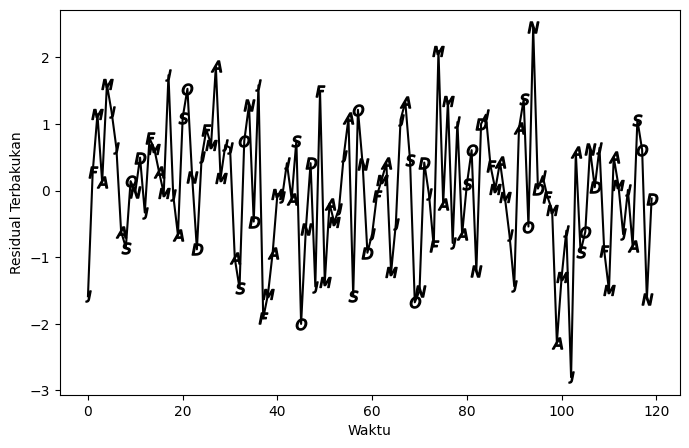

In [ ]:
#memetakan sisaan dengan bentuk plot sesuai simbol bulan/musim
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
 plt.plot(i, std_resid[i], marker=mapping[i%12+1],
 color='black', markersize=8)

#membuat plot sisaan terbakukan
plt.plot(std_resid, color='black')
plt.xlabel('Waktu'), plt.ylabel('Residual Terbakukan')
plt.show()


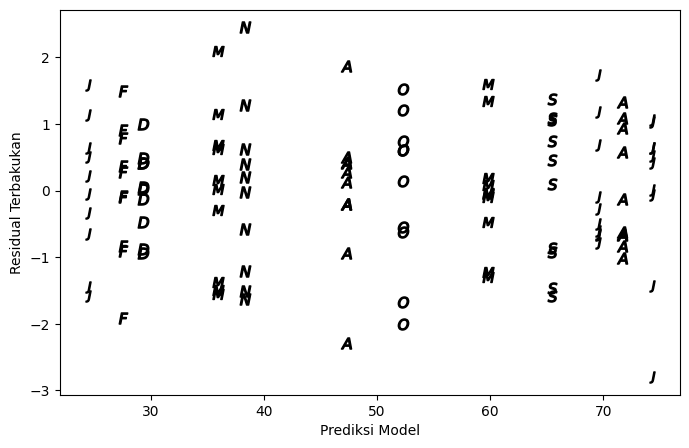

In [ ]:
# membuat plot fittedvalues dengan residual terbakukan dengan simbol bulan
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
  plt.plot(musiman.fittedvalues.values[i],
           std_resid[i], marker=mapping[i%12+1],
           color='black', markersize=8)
plt.xlabel('Prediksi Model'),plt.ylabel('Residual Terbakukan')
plt.show()

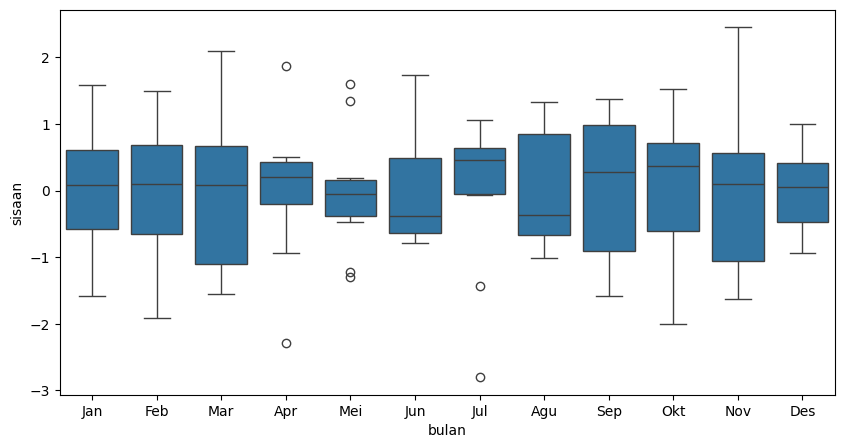

In [ ]:
#membuat list daftar bulan
bulan=['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']*10

#membuat dataframe untuk mengidentifikasi sisaan dan periode bulannya
box_sisaan=pd.DataFrame(zip(bulan[:-1], std_resid),
columns=['bulan','sisaan'])

#membuat boxplot per buln
plt.figure(figsize=(10,5))
sns.boxplot(x='bulan',y='sisaan',data=box_sisaan)
plt.show()

Bulan Mei memiliki ragam kecil dan bualan juli juga memiliki ragam yang kecil artinya Dibulan-bulan terurut tidak memiliki pola khusus.

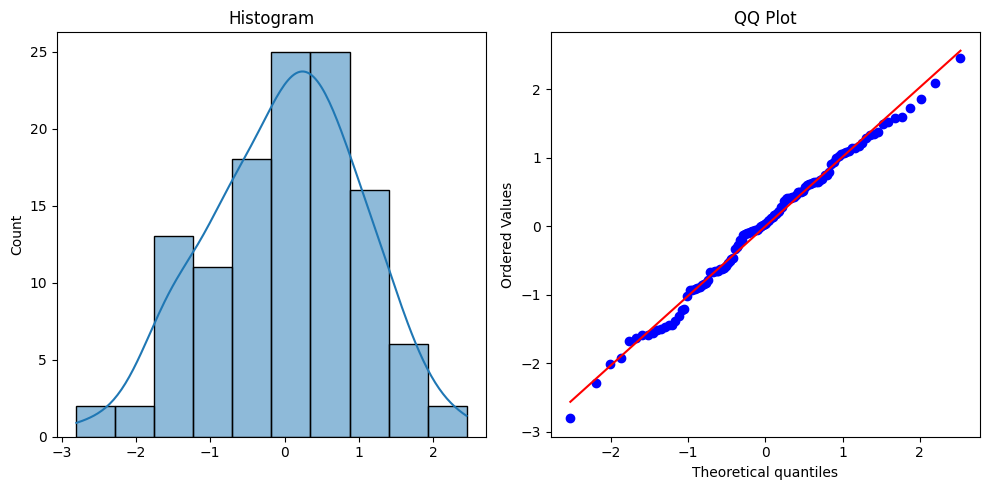

In [ ]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(std_resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(std_resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Berdasarkan plot-plot tersebut apakah dapat dikatakan bahwa model yang dipaskan sudah tepat?

Grafik ini menunjukkan histogram residual dan QQ plot residual, yang digunakan untuk mengevaluasi apakah residual dari model regresi mengikuti distribusi normal.

1. Histogram Residual
	•	Histogram menunjukkan distribusi residual yang simetris dan menyerupai distribusi normal.
	•	Kurva kernel density estimation (KDE) yang melapisi histogram juga menunjukkan bentuk lonceng (bell-shaped curve), yang merupakan karakteristik distribusi normal.
	•	Tidak ada skewness yang signifikan, menunjukkan bahwa distribusi residual cukup seimbang.

2. QQ Plot Residual
	•	QQ plot membandingkan residual aktual dengan distribusi normal teoritis.
	•	Titik-titik sebagian besar berada di sekitar garis merah, menunjukkan bahwa residual mendekati distribusi normal.
	•	Hanya sedikit penyimpangan di ekor distribusi, tetapi ini masih dalam batas yang wajar dan tidak menunjukkan outlier ekstrem.

Kesimpulan

Normalitas residual terpenuhi, karena histogram menunjukkan pola distribusi normal dan titik-titik pada QQ plot mengikuti garis teoritis. Tidak ada skewness atau outlier ekstrem, sehingga model regresi tidak mengalami masalah signifikan dalam hal normalitas residual.Sedikit penyimpangan di ekor QQ plot, tetapi tidak cukup kuat untuk dianggap sebagai masalah serius. Sehingga, Model ini memenuhi asumsi normalitas, sehingga hasil estimasi regresi dapat dianggap valid dalam konteks distribusi residual.

In [ ]:
# pengepasan model regresi dengan intersep
musiman_int=sm.OLS(df_seasonal["Value"],sm.add_constant(musim.iloc[:,1:])).fit()

In [ ]:
print(musiman_int.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        15:24:26   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4468      0.619     39.524      0.0

Perhatikan hasil pengepasan model dengan intersep. Bandingkan hasilnya dengan pengepasan tanpa intersep. Bagaimana interpretasi model dengan intersep?



Model tanpa intersep memperlakukan setiap bulan sebagai variabel independen yang berdiri sendiri, sehingga nilai koefisiennya langsung mencerminkan nilai rata-rata variabel dependen untuk bulan tersebut. Artinya, tidak ada bulan yang dijadikan patokan atau referensi, dan semua bulan dianggap memiliki kontribusi tersendiri dalam model.

Sebaliknya, model dengan intersep memiliki baseline (patokan), biasanya bulan pertama dalam dataset, seperti Januari. Dalam model ini, nilai intersep merepresentasikan rata-rata nilai variabel dependen untuk bulan referensi, sementara koefisien bulan lainnya menunjukkan perbedaan nilai dibandingkan bulan tersebut. Dengan kata lain, model ini membantu memahami bagaimana masing-masing bulan berbeda dari baseline, sehingga lebih mudah diinterpretasikan.

Dari segi kinerja model, nilai R-squared, AIC, dan BIC tidak berubah secara signifikan, yang berarti kedua model memiliki tingkat penyesuaian yang hampir sama terhadap data. Namun, model dengan intersep lebih sering digunakan karena memberikan gambaran yang lebih jelas tentang perbedaan antar bulan dalam konteks pola musiman.

## Kecenderungan Linear dan Musiman

In [ ]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.5, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=2, size=n)

# Gabungan semua komponen
series = trend + seasonality + noise


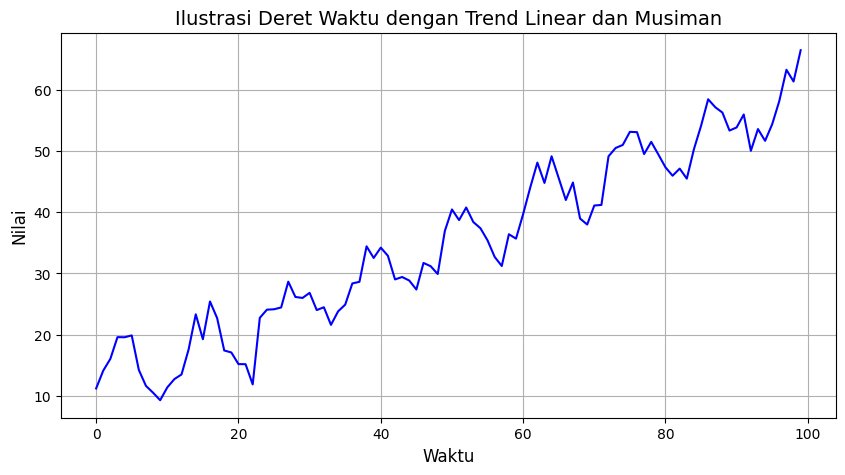

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, series, color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman', fontsize=14)
plt.grid()
plt.show()

Untuk deret tersebut, dibutuhkan model yang mampu menangkap kecenderungan linear (tren) sekaligus kecenderungan musiman dalam deret. Salah satu model sederhana yang dapat digunakan adalah model regresi linear dengan variabel musiman.

In [ ]:
# mengubah data menjadi format dataframe
df_mix = pd.DataFrame(series, columns=['Value'])

# mengekstrak komponen musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
season= Seasonality(12, initial_period=1).in_sample(df_mix.index)
season.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [ ]:
season['period']=x

model_mix=sm.OLS(series,season).fit()

In [ ]:
print(model_mix.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     472.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.07e-73
Time:                        15:24:27   Log-Likelihood:                -200.88
No. Observations:                 100   AIC:                             427.8
Df Residuals:                      87   BIC:                             461.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       10.1295      0.721     14.055      0.0

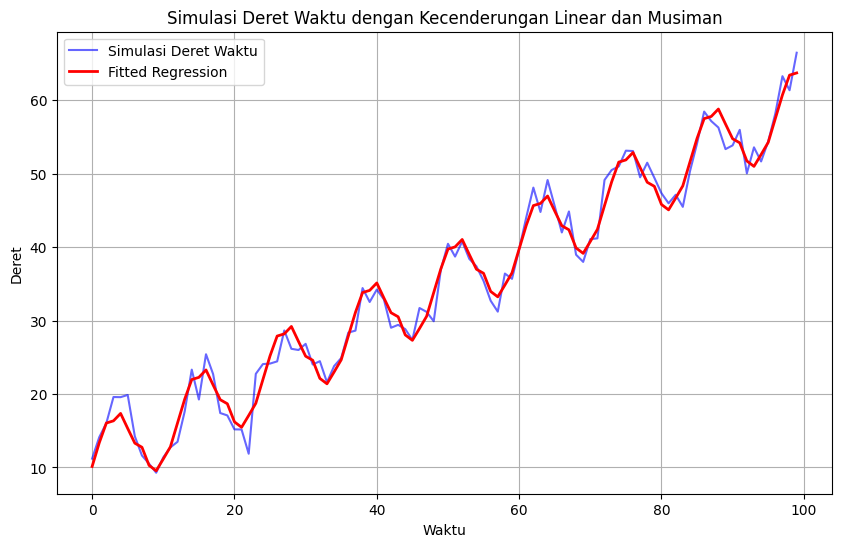

In [ ]:
# Prediksi menggunakan model yang sudah dilatih
pred_mix = model_mix.predict(season)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(x, series, label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(x, pred_mix, label='Fitted Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Linear dan Musiman')
plt.xlabel('Waktu')
plt.ylabel('Deret')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# uji asumsi model

Saat melihat plot dari suatu deret, terkadang kita tidak yakin komponen apa saja yang ada dalam deret. Misalkan, apakah deret tidak memuat tren? apakah ada tren? apakah ada komponen musiman? Untuk memastikan komponen apa saja yang ada dalam suatu deret, dapat dilakukan dengan dekomposisi deret. Dekomposisi deret bertujuan menguraikan deret menjadi 3 komponen, yaitu tren, musiman, dan noise.

In [ ]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='additive', period=12)

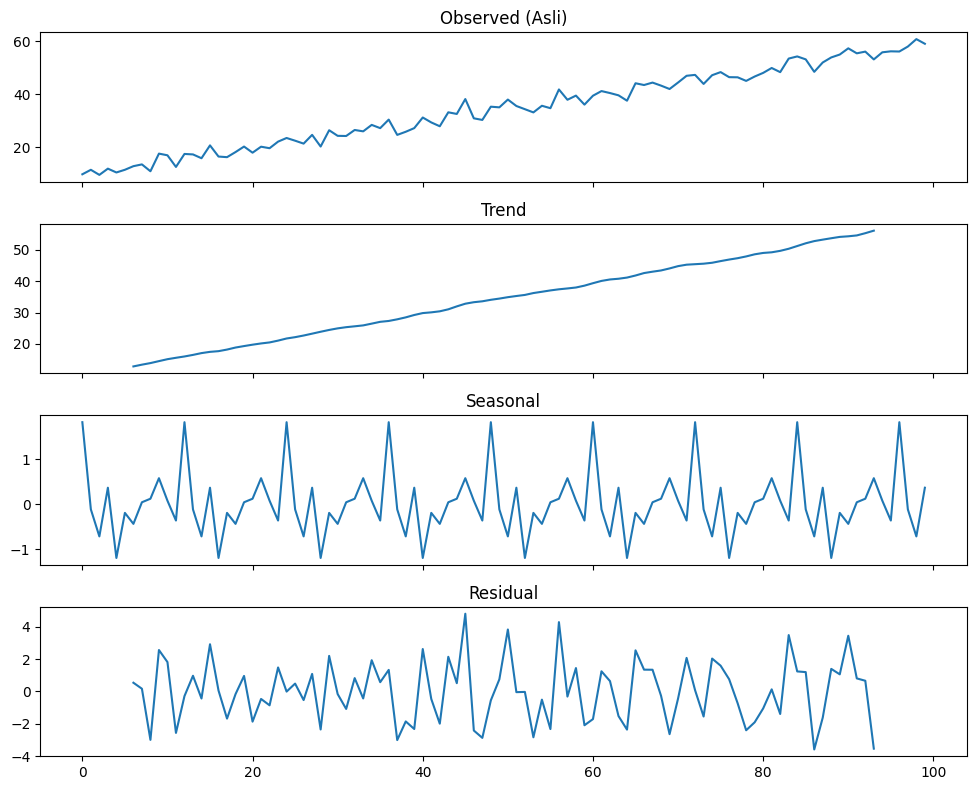

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

Bagaimana interpretasi hasil dekomposisi deret tersebut?
Hasil dekomposisi deret waktu ini menunjukkan bahwa data memiliki tiga komponen utama: tren, musiman, dan residual. Komponen tren memperlihatkan adanya peningkatan nilai secara bertahap seiring waktu, yang menandakan adanya pertumbuhan dalam jangka panjang. Sementara itu, komponen musiman menunjukkan adanya pola fluktuasi yang berulang dalam periode tertentu, yang mengindikasikan bahwa ada faktor musiman yang memengaruhi data, seperti perubahan tahunan, cuaca, atau kebiasaan pasar.

Selain itu, komponen residual menunjukkan variasi acak yang tidak dapat dijelaskan oleh tren maupun faktor musiman. Dalam grafik ini, residual tampak tersebar secara acak, yang menandakan bahwa model dekomposisi telah menangkap pola utama dengan cukup baik. Jika residual menunjukkan pola tertentu, itu bisa menjadi indikasi bahwa masih ada faktor lain yang belum diperhitungkan dalam model.

Secara keseluruhan, data ini menunjukkan adanya tren pertumbuhan yang stabil dan pola musiman yang jelas, yang berarti pola dalam data dapat diprediksi dengan baik.

In [ ]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear dan musiman
from statsmodels.tsa.seasonal import seasonal_decompose
result_mix = seasonal_decompose(df_mix['Value'], model='additive', period=12)

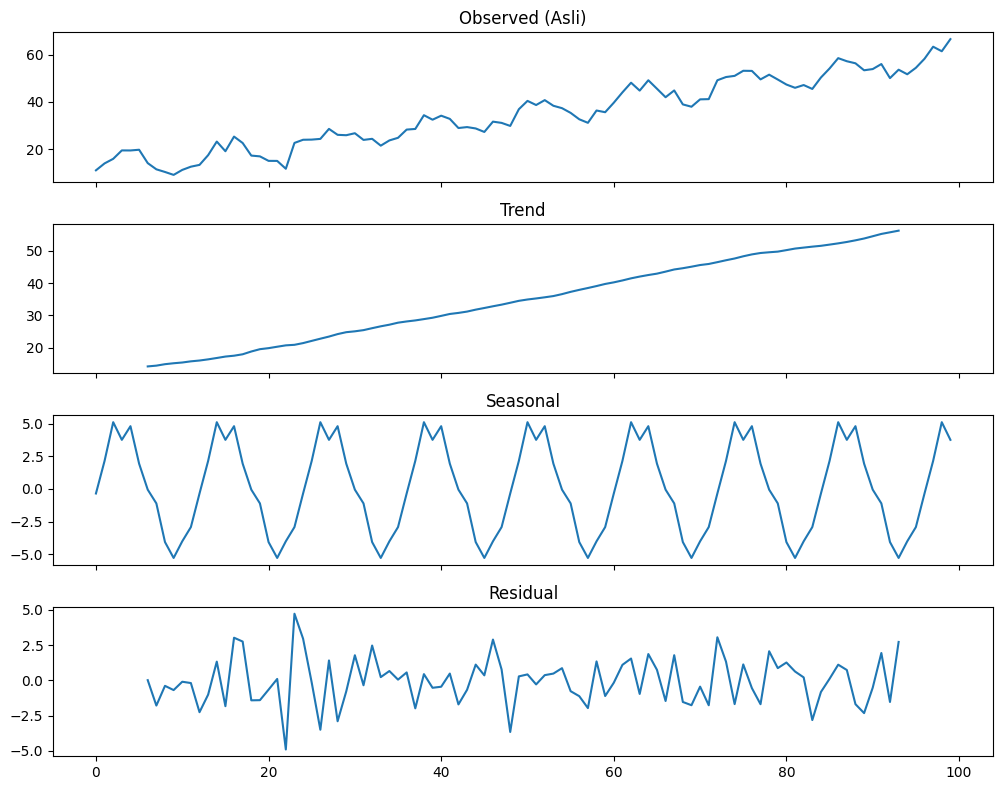

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result_mix.observed.plot(ax=axes[0], title='Observed (Asli)')
result_mix.trend.plot(ax=axes[1], title='Trend')
result_mix.seasonal.plot(ax=axes[2], title='Seasonal')
result_mix.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()


Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model `Aditif` dan `multiplikatif`.

- Model `aditif` digunakan jika ragam deret relatif konstan atau kecil

- Model `multiplikatif` digunakan jika ragam deret besar

In [ ]:
# ilustrasi untuk deret multiplikatif
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.05, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 1+ 0.5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=0.2, size=n)

# Gabungan semua komponen
series_multi = trend*seasonality + noise

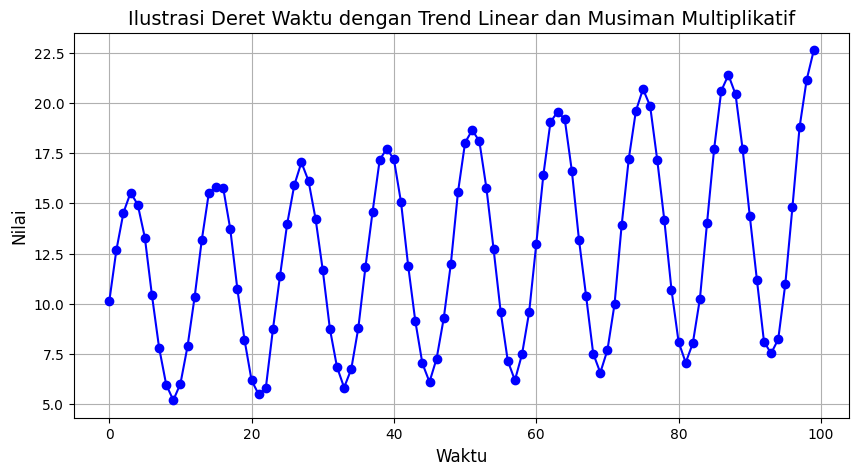

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, series_multi, color='b', marker='o')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman Multiplikatif', fontsize=14)
plt.grid()
plt.show()

Dekomposisi dengan model multiplikatif hanya bisa dilakukan untuk deret dengan nilai >0, sehingga jika deret memiliki nilai 0 atau negatif maka deret perlu ditransformasi.

In [ ]:
#  Dekomposisi dengan model multiplikatif
# mengubah data menjadi format dataframe
df_multi = pd.DataFrame(series_multi, columns=['Value'])

from statsmodels.tsa.seasonal import seasonal_decompose
result_multi = seasonal_decompose(df_multi['Value'], model='multiplicative', period=12)

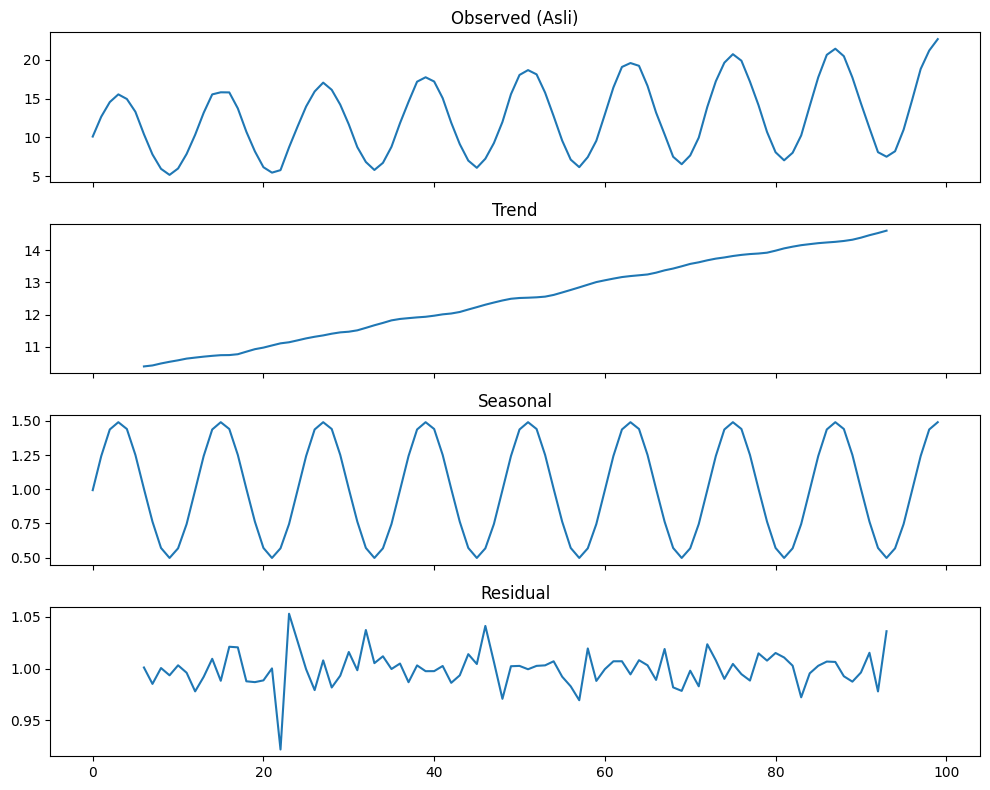

In [ ]:
# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_multi.observed.plot(ax=axes[0], title='Observed (Asli)')
result_multi.trend.plot(ax=axes[1], title='Trend')
result_multi.seasonal.plot(ax=axes[2], title='Seasonal')
result_multi.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

In [ ]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Hanya noise acak tanpa trend atau musiman
noise = np.random.normal(loc=10, scale=2, size=n)  # Nilai acak sekitar 10

# Buat DataFrame untuk regresi
df = pd.DataFrame({'Time': x, 'Series': noise})
df['Time'] = pd.to_datetime(df['Time'], unit='D')  # Konversi ke format waktu
df.set_index('Time', inplace=True)

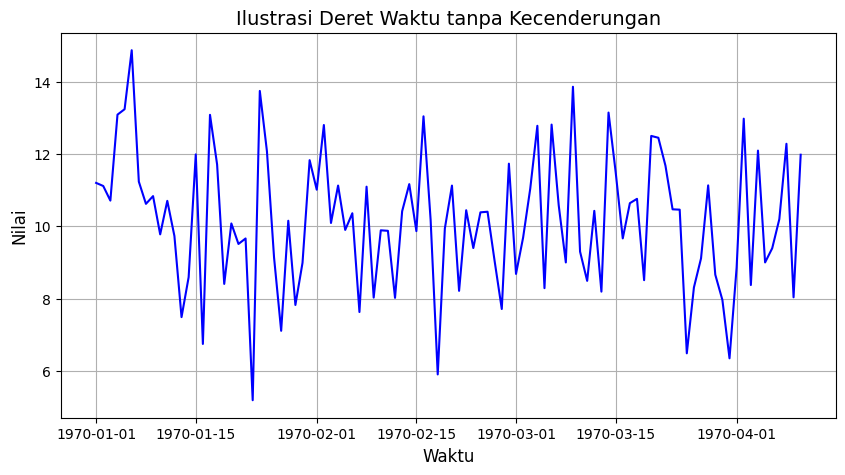

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Series'], color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu tanpa Kecenderungan', fontsize=14)
plt.grid()
plt.show()

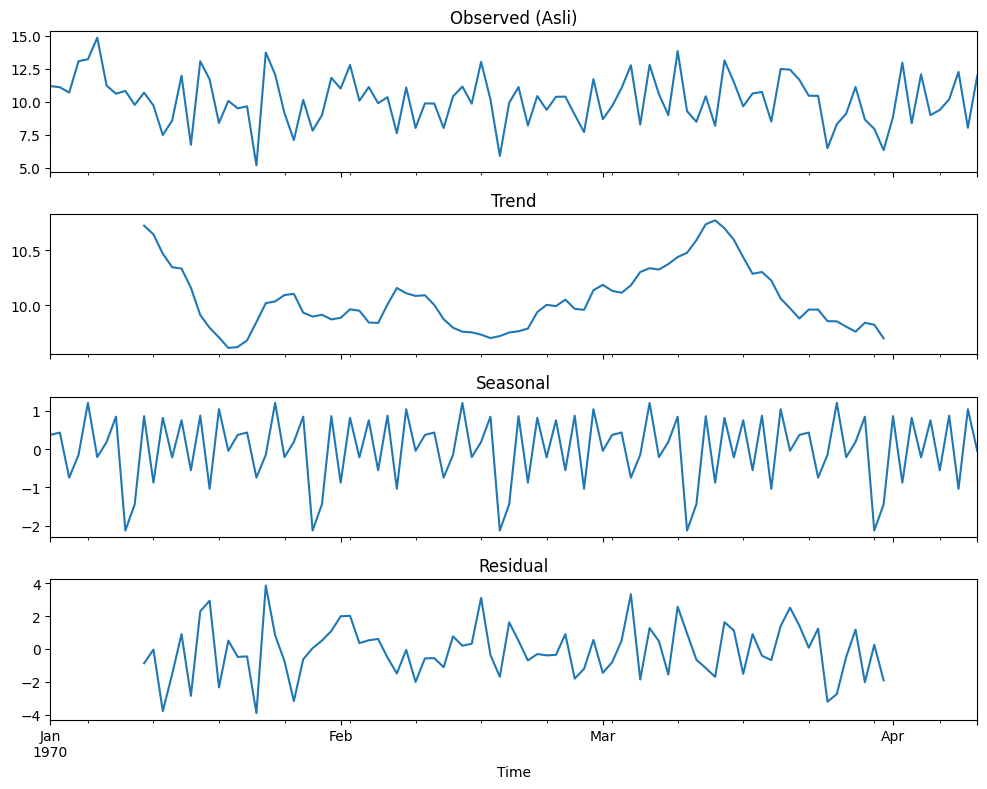

In [ ]:
# Lakukan dekomposisi dengan model aditif
result = seasonal_decompose(df['Series'], model='additive', period=20)

# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()